In [1]:
import pandas as pd

In [2]:
prima = pd.read_csv('D:\IBM PROJECT\Prima Cancer Prediction - Neural Networks\prima_indians.csv')

In [3]:
prima.head(2)

,number of time pregnant,plasma glucose,diastolic blood pressure,tricepts skinfold thickness,2 hour serum insulin,BMI,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [4]:
prima.tail(2)

,number of time pregnant,plasma glucose,diastolic blood pressure,tricepts skinfold thickness,2 hour serum insulin,BMI,Diabetes pedigree function,Age,Class
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
# check the shape of the data
prima.shape

(768, 9)

In [6]:
prima.columns.tolist()

['number of time pregnant',
 ' plasma glucose',
 ' diastolic blood pressure',
 ' tricepts skinfold thickness',
 ' 2 hour serum insulin',
 ' BMI',
 ' Diabetes pedigree function',
 ' Age',
 ' Class']

In [7]:
#Removing white spaces
prima.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

In [8]:
prima.columns.tolist()

['number_of_time_pregnant',
 'plasma_glucose',
 'diastolic_blood_pressure',
 'tricepts_skinfold_thickness',
 '2_hour_serum_insulin',
 'BMI',
 'Diabetes_pedigree_function',
 'Age',
 'Class']

# Data Visualization

In [9]:
import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [10]:
#Discriptive analysis
prima.describe()

,number_of_time_pregnant,plasma_glucose,diastolic_blood_pressure,tricepts_skinfold_thickness,2_hour_serum_insulin,BMI,Diabetes_pedigree_function,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Notes
Data not scaled uniformly, like plasma glucose is highly scaled as compared to Diabetes pedigree function.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBD4A91518>,
      dtype=object)

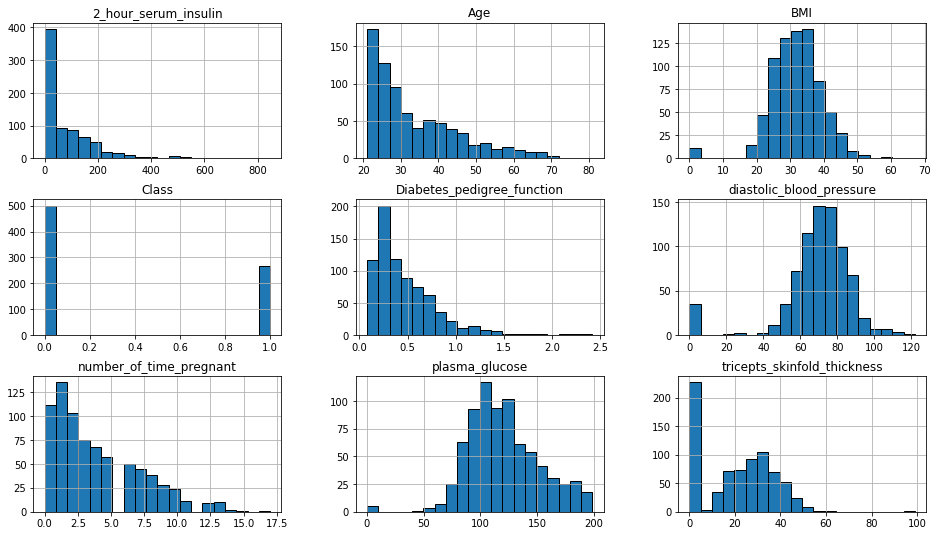

In [11]:
# Checking the distribution of variables
prima.hist(figsize=(16,9), edgecolor="black", bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EBD54F9748>,
      dtype=object)

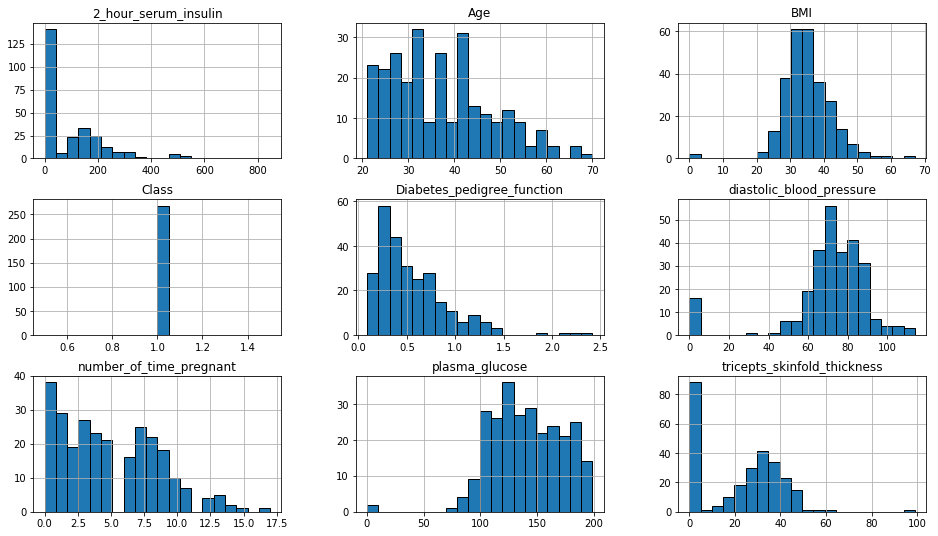

In [12]:
#Checking variables that are likely to cause diabetes
diabetes_positive = prima[prima['Class'] == 1]
diabetes_positive.hist(figsize=(16,9), edgecolor="black", bins=20)

C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Anaconda\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


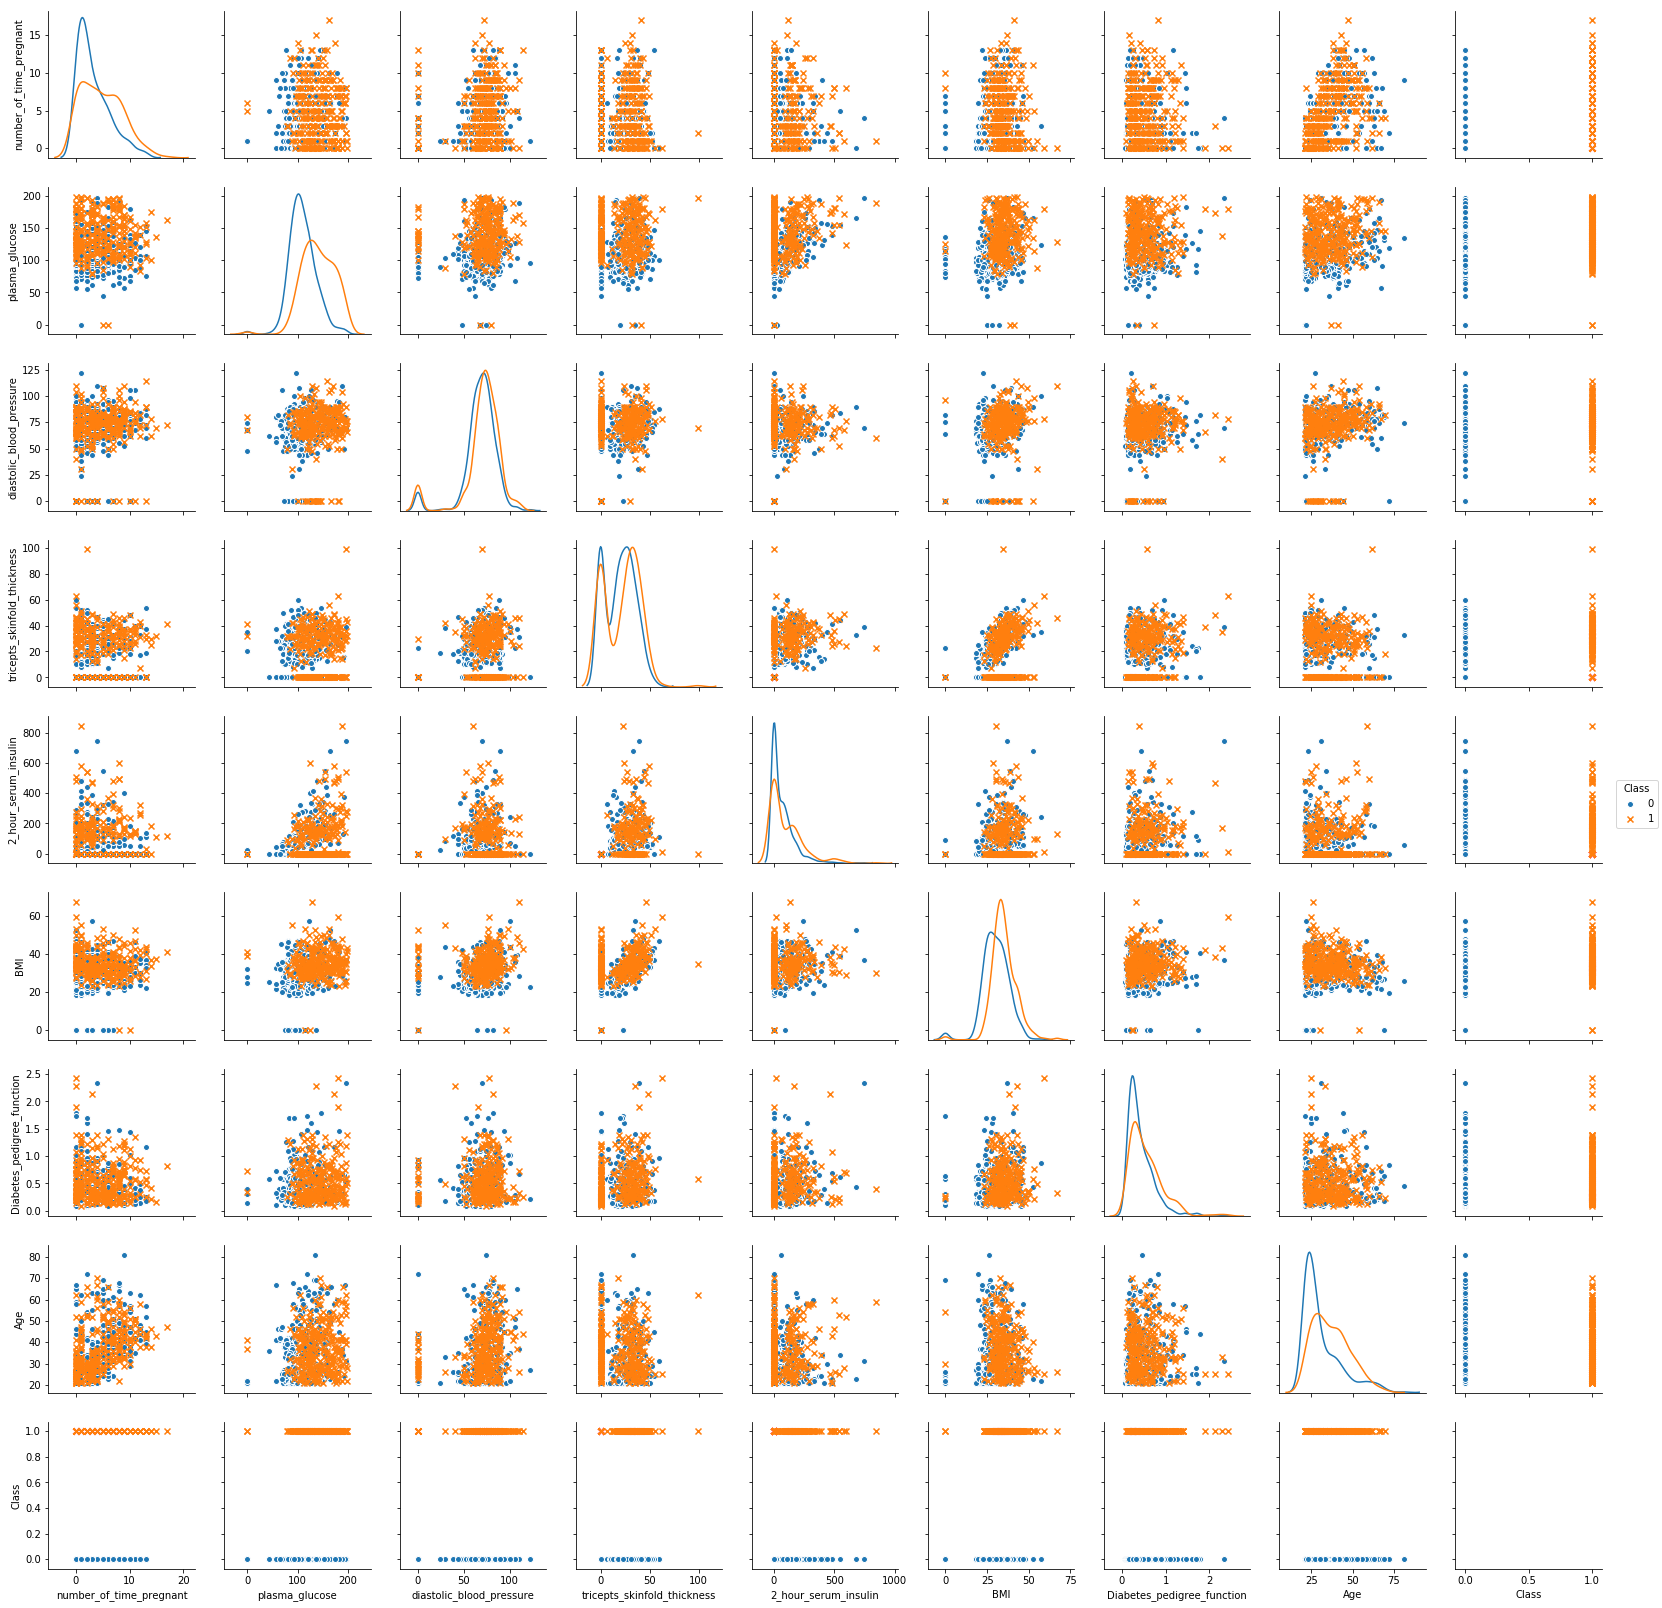

In [13]:
sns.pairplot(prima, hue='Class', markers=['o', 'x'], diag_kind='kde')

# Splitting into training and testing datasets

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix,classification_report

In [15]:
x = prima.drop(['Class'], axis=1)
y = prima['Class']

In [16]:
x.head(3)

,number_of_time_pregnant,plasma_glucose,diastolic_blood_pressure,tricepts_skinfold_thickness,2_hour_serum_insulin,BMI,Diabetes_pedigree_function,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32


In [17]:
y.head(3)

0    1
1    0
2    1
Name: Class, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 101)

# Data scaling so as to increase model frequency

In [19]:
scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

# Keras Data Model

We will use the following parameters in our implementation;

* Hidden Layers - 2 , each consisiting of 16 neurons.
* Activation - RELU for hidden, SOFTMAX for output layer.
* Optimizer - SGD
* Learning Rate Decay - 0.01
* L2 Regularization

In [20]:
from tensorflow.contrib import keras
from keras import models, layers, losses, optimizers, metrics

C:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [21]:
model = models.Sequential()

# Hyperparameters
hold_prob = 0.01
beta = 1e-8
alpha = 0.05
lr_decay = 0.01
iterations = 400
validation_split = 0.5
opt_momentum = 0.9 # leads to faster and stable convergence. Also reduces oscillations by only updating relevant parameters.
batch_size = 32

# Optimizer - SGD + Nesterov + Momentum
opt = optimizers.SGD(lr=alpha, decay=lr_decay, momentum=opt_momentum, nesterov=True)

# First Layer
model.add(layers.Dense(input_dim=8, units=8, activation='relu'))

# Hidden Layers
model.add(layers.Dense(units=16, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

model.add(layers.Dense(units=16, activation='relu', kernel_regularizer=keras.regularizers.l2(beta)))
model.add(layers.Dropout(hold_prob))

# Output Layer
model.add(layers.Dense(units=2, activation='softmax'))

# Compiling the Model
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(x=scaled_x_train, y=y_train, epochs=iterations, validation_split=validation_split, batch_size=batch_size)

Train on 268 samples, validate on 269 samples
Epoch 1/400
268/268 [==============================] - 1s 4ms/step - loss: 0.6717 - acc: 0.6493 - val_loss: 0.6510 - val_acc: 0.6580
Epoch 2/400
268/268 [==============================] - 0s 147us/step - loss: 0.6564 - acc: 0.6455 - val_loss: 0.6451 - val_acc: 0.6580
Epoch 3/400
268/268 [==============================] - 0s 149us/step - loss: 0.6532 - acc: 0.6455 - val_loss: 0.6416 - val_acc: 0.6580
Epoch 4/400
268/268 [==============================] - 0s 148us/step - loss: 0.6488 - acc: 0.6455 - val_loss: 0.6370 - val_acc: 0.6580
Epoch 5/400
268/268 [==============================] - 0s 134us/step - loss: 0.6412 - acc: 0.6455 - val_loss: 0.6340 - val_acc: 0.6580
Epoch 6/400
268/268 [==============================] - 0s 139us/step - loss: 0.6389 - acc: 0.6455 - val_loss: 0.6301 - val_acc: 0.6580
Epoch 7/400
268/268 [==============================] - 0s 155us/step - loss: 0.6318 - acc: 0.6455 - val_loss: 0.6245 - val_acc: 0.6580
Epoch 8/400

Epoch 60/400
268/268 [==============================] - 0s 127us/step - loss: 0.4767 - acc: 0.7575 - val_loss: 0.4927 - val_acc: 0.7509
Epoch 61/400
268/268 [==============================] - 0s 119us/step - loss: 0.4780 - acc: 0.7500 - val_loss: 0.4958 - val_acc: 0.7695
Epoch 62/400
268/268 [==============================] - 0s 114us/step - loss: 0.4875 - acc: 0.7500 - val_loss: 0.5028 - val_acc: 0.7398
Epoch 63/400
268/268 [==============================] - 0s 114us/step - loss: 0.4757 - acc: 0.7575 - val_loss: 0.4931 - val_acc: 0.7435
Epoch 64/400
268/268 [==============================] - 0s 110us/step - loss: 0.4770 - acc: 0.7649 - val_loss: 0.4939 - val_acc: 0.7435
Epoch 65/400
268/268 [==============================] - 0s 112us/step - loss: 0.4876 - acc: 0.7463 - val_loss: 0.5059 - val_acc: 0.7323
Epoch 66/400
268/268 [==============================] - 0s 116us/step - loss: 0.4851 - acc: 0.7799 - val_loss: 0.4905 - val_acc: 0.7546
Epoch 67/400
268/268 [==========================

268/268 [==============================] - 0s 90us/step - loss: 0.4453 - acc: 0.7948 - val_loss: 0.4889 - val_acc: 0.7398
Epoch 121/400
268/268 [==============================] - 0s 104us/step - loss: 0.4564 - acc: 0.7873 - val_loss: 0.4905 - val_acc: 0.7323
Epoch 122/400
268/268 [==============================] - 0s 88us/step - loss: 0.4531 - acc: 0.7873 - val_loss: 0.4913 - val_acc: 0.7286
Epoch 123/400
268/268 [==============================] - 0s 90us/step - loss: 0.4553 - acc: 0.7873 - val_loss: 0.4900 - val_acc: 0.7398
Epoch 124/400
268/268 [==============================] - 0s 90us/step - loss: 0.4553 - acc: 0.7910 - val_loss: 0.4914 - val_acc: 0.7398
Epoch 125/400
268/268 [==============================] - 0s 104us/step - loss: 0.4570 - acc: 0.7910 - val_loss: 0.4907 - val_acc: 0.7398
Epoch 126/400
268/268 [==============================] - 0s 91us/step - loss: 0.4559 - acc: 0.7948 - val_loss: 0.4906 - val_acc: 0.7361
Epoch 127/400
268/268 [==============================] - 0s 

268/268 [==============================] - 0s 90us/step - loss: 0.4398 - acc: 0.8060 - val_loss: 0.4912 - val_acc: 0.7435
Epoch 181/400
268/268 [==============================] - 0s 106us/step - loss: 0.4440 - acc: 0.8022 - val_loss: 0.4931 - val_acc: 0.7472
Epoch 182/400
268/268 [==============================] - 0s 67us/step - loss: 0.4364 - acc: 0.7985 - val_loss: 0.4932 - val_acc: 0.7361
Epoch 183/400
268/268 [==============================] - 0s 90us/step - loss: 0.4438 - acc: 0.7948 - val_loss: 0.4903 - val_acc: 0.7323
Epoch 184/400
268/268 [==============================] - 0s 90us/step - loss: 0.4417 - acc: 0.8060 - val_loss: 0.4936 - val_acc: 0.7361
Epoch 185/400
268/268 [==============================] - 0s 103us/step - loss: 0.4397 - acc: 0.7873 - val_loss: 0.4921 - val_acc: 0.7472
Epoch 186/400
268/268 [==============================] - 0s 73us/step - loss: 0.4442 - acc: 0.8022 - val_loss: 0.4919 - val_acc: 0.7286
Epoch 187/400
268/268 [==============================] - 0s 

268/268 [==============================] - 0s 90us/step - loss: 0.4351 - acc: 0.8097 - val_loss: 0.4956 - val_acc: 0.7249
Epoch 241/400
268/268 [==============================] - 0s 75us/step - loss: 0.4306 - acc: 0.8060 - val_loss: 0.4947 - val_acc: 0.7249
Epoch 242/400
268/268 [==============================] - 0s 86us/step - loss: 0.4302 - acc: 0.8134 - val_loss: 0.4949 - val_acc: 0.7249
Epoch 243/400
268/268 [==============================] - 0s 90us/step - loss: 0.4243 - acc: 0.8172 - val_loss: 0.4950 - val_acc: 0.7212
Epoch 244/400
268/268 [==============================] - 0s 104us/step - loss: 0.4395 - acc: 0.8060 - val_loss: 0.4945 - val_acc: 0.7249
Epoch 245/400
268/268 [==============================] - 0s 90us/step - loss: 0.4230 - acc: 0.8134 - val_loss: 0.4968 - val_acc: 0.7435
Epoch 246/400
268/268 [==============================] - 0s 83us/step - loss: 0.4337 - acc: 0.7948 - val_loss: 0.4953 - val_acc: 0.7286
Epoch 247/400
268/268 [==============================] - 0s 9

Epoch 300/400
268/268 [==============================] - 0s 75us/step - loss: 0.4164 - acc: 0.8134 - val_loss: 0.4949 - val_acc: 0.7175
Epoch 301/400
268/268 [==============================] - 0s 106us/step - loss: 0.4276 - acc: 0.8134 - val_loss: 0.4957 - val_acc: 0.7212
Epoch 302/400
268/268 [==============================] - 0s 84us/step - loss: 0.4198 - acc: 0.8097 - val_loss: 0.4962 - val_acc: 0.7175
Epoch 303/400
268/268 [==============================] - 0s 90us/step - loss: 0.4300 - acc: 0.8134 - val_loss: 0.4974 - val_acc: 0.7323
Epoch 304/400
268/268 [==============================] - 0s 104us/step - loss: 0.4301 - acc: 0.8060 - val_loss: 0.4970 - val_acc: 0.7175
Epoch 305/400
268/268 [==============================] - 0s 95us/step - loss: 0.4215 - acc: 0.8022 - val_loss: 0.4968 - val_acc: 0.7175
Epoch 306/400
268/268 [==============================] - 0s 97us/step - loss: 0.4208 - acc: 0.8209 - val_loss: 0.4967 - val_acc: 0.7175
Epoch 307/400
268/268 [=======================

Epoch 360/400
268/268 [==============================] - 0s 75us/step - loss: 0.4191 - acc: 0.7985 - val_loss: 0.4995 - val_acc: 0.7323
Epoch 361/400
268/268 [==============================] - 0s 90us/step - loss: 0.4228 - acc: 0.7948 - val_loss: 0.4969 - val_acc: 0.7212
Epoch 362/400
268/268 [==============================] - 0s 104us/step - loss: 0.4110 - acc: 0.8134 - val_loss: 0.4959 - val_acc: 0.7212
Epoch 363/400
268/268 [==============================] - 0s 104us/step - loss: 0.4172 - acc: 0.8209 - val_loss: 0.4950 - val_acc: 0.7175
Epoch 364/400
268/268 [==============================] - 0s 75us/step - loss: 0.4160 - acc: 0.8209 - val_loss: 0.4958 - val_acc: 0.7175
Epoch 365/400
268/268 [==============================] - 0s 104us/step - loss: 0.4168 - acc: 0.8134 - val_loss: 0.4962 - val_acc: 0.7212
Epoch 366/400
268/268 [==============================] - 0s 61us/step - loss: 0.4132 - acc: 0.8172 - val_loss: 0.4946 - val_acc: 0.7249
Epoch 367/400
268/268 [======================

# Checking how model performs on new data

In [22]:
predictions = model.predict_classes(scaled_x_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.80      0.84      0.82       150
          1       0.67      0.60      0.64        81

avg / total       0.75      0.76      0.75       231

